In [74]:
#Hospital locations data cleaning

In [75]:
# Dependencies
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

In [76]:
csvpath1 = 'DataCleaning/Resources/Hospitals.csv'
hospitals_df = pd.read_csv(csvpath1)
hospitals_df

,Hospitals,Address,State,Type,Status,COUNTY,Beds,County
0,CENTRAL VALLEY GENERAL HOSPITAL,1025 NORTH DOUTY STREET,CA,GENERAL ACUTE CARE,CLOSED,KINGS,49.0,Kings
1,LOS ROBLES HOSPITAL & MEDICAL CENTER - EAST CA...,150 VIA MERIDA,CA,GENERAL ACUTE CARE,OPEN,VENTURA,62.0,Ventura
2,EAST LOS ANGELES DOCTORS HOSPITAL,4060 WHITTIER BOULEVARD,CA,GENERAL ACUTE CARE,OPEN,LOS ANGELES,127.0,Los Angeles
3,SOUTHERN CALIFORNIA HOSPITAL AT HOLLYWOOD,6245 DE LONGPRE AVENUE,CA,GENERAL ACUTE CARE,OPEN,LOS ANGELES,100.0,Los Angeles
4,KINDRED HOSPITAL BALDWIN PARK,14148 FRANCISQUITO AVENUE,CA,GENERAL ACUTE CARE,OPEN,LOS ANGELES,95.0,Los Angeles
...,...,...,...,...,...,...,...,...
7633,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7634,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7635,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7636,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [77]:
GA_hos_df = hospitals_df.loc[hospitals_df['State'] == 'GA'][['Hospitals','County','Status','Type', 'Beds' ]]
GA_open_df= GA_hos_df.loc[GA_hos_df['Status'] == 'OPEN'][['Hospitals','County','Type', 'Beds' ]]
GA_open_df



,Hospitals,County,Type,Beds
32,ST JOSEPH'S HOSPITAL - SAVANNAH,Chatham,GENERAL ACUTE CARE,294.0
33,KINDRED HOSPITAL ROME,Floyd,LONG TERM CARE,45.0
34,UPSON REGIONAL MEDICAL CENTER,Upson,GENERAL ACUTE CARE,115.0
35,PHOEBE SUMTER MEDICAL CENTER,Sumter,GENERAL ACUTE CARE,76.0
36,ROOSEVELT WARM SPRINGS LTAC HOSPITAL,Meriwether,LONG TERM CARE,32.0
...,...,...,...,...
7536,DEVEREUX TREATMENT NETWORK,Cobb,PSYCHIATRIC,100.0
7537,WELLSTAR PAULDING HOSPITAL,Paulding,GENERAL ACUTE CARE,216.0
7538,EMORY DUNWOODY MEDICAL CENTER,Dekalb,GENERAL ACUTE CARE,168.0
7539,BRADLEY CENTER OF SAINT FRANCIS,Muscogee,PSYCHIATRIC,-999.0


In [78]:
num_beds_df= GA_open_df.groupby(['County'])['Beds'].sum()

num_hos_df = GA_open_df.groupby(['County']).count()

lst = num_beds_df.sort_values(ascending = False) 

beds_df = pd.DataFrame(lst) 
beds_df


,Beds
County,
Fulton,3740.0
Dekalb,3124.0
Chatham,1699.0
Cobb,1524.0
Bibb,1354.0
...,...
Jasper,17.0
Dade,13.0
Gwinnett,-57.0


In [79]:
csvpath2 = 'DataCleaning/Resources/GA_county_cases.csv'
Case_df = pd.read_csv(csvpath2)
Case_df

,county_name,cases,county_id,State FIPS code,County FIPS code,population,hospitalization,deaths,case rate,death rate,14 day case rate,14 day cases,antigen_cases,probable_deaths
0,Appling,1717,US-13001,13,1,18561,142,50,9250.58,269.38,511.83,95,316,4
1,Atkinson,745,US-13003,13,3,8330,108,15,8943.58,180.07,276.11,23,204,0
2,Bacon,1002,US-13005,13,5,11404,73,25,8786.39,219.22,499.82,57,323,6
3,Baker,151,US-13007,13,7,3116,31,6,4845.96,192.55,128.37,4,57,0
4,Baldwin,3542,US-13009,13,9,44428,273,90,7972.45,202.57,535.70,238,497,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
156,Whitfield,13628,US-13313,13,313,104672,660,169,13019.72,161.46,728.94,763,1585,9
157,Wilcox,434,US-13315,13,315,8790,66,26,4937.43,295.79,182.03,16,300,17
158,Wilkes,611,US-13317,13,317,10014,61,15,6101.46,149.79,499.30,50,328,5
159,Wilkinson,665,US-13319,13,319,8919,108,21,7455.99,235.45,325.15,29,158,0


In [80]:
filtered_Case_df = Case_df[['county_name', 'cases','hospitalization','deaths','case rate','death rate']]
cleaned_Case_df = filtered_Case_df.rename(columns={'county_name':'County',
                                 'cases':'Cases',
                                 'hospitalization':'Hospitalization',
                                 'deaths':'Deaths',
                                 'case rate':'Cases/100,000Population',
                                 'death rate':'Deaths/100,000Population'})
cleaned_Case_df

,County,Cases,Hospitalization,Deaths,"Cases/100,000Population","Deaths/100,000Population"
0,Appling,1717,142,50,9250.58,269.38
1,Atkinson,745,108,15,8943.58,180.07
2,Bacon,1002,73,25,8786.39,219.22
3,Baker,151,31,6,4845.96,192.55
4,Baldwin,3542,273,90,7972.45,202.57
...,...,...,...,...,...,...
156,Whitfield,13628,660,169,13019.72,161.46
157,Wilcox,434,66,26,4937.43,295.79
158,Wilkes,611,61,15,6101.46,149.79
159,Wilkinson,665,108,21,7455.99,235.45


In [81]:
merge_df = cleaned_Case_df.merge(beds_df, on='County')
final_df = merge_df.set_index('County')

final_df

,Cases,Hospitalization,Deaths,"Cases/100,000Population","Deaths/100,000Population",Beds
County,,,,,,
Appling,1717,142,50,9250.58,269.38,49.0
Bacon,1002,73,25,8786.39,219.22,25.0
Baldwin,3542,273,90,7972.45,202.57,365.0
Barrow,7447,500,100,8620.91,115.76,56.0
Bartow,9206,605,159,8310.84,143.54,119.0
...,...,...,...,...,...,...
Wayne,2373,229,62,7916.86,206.85,88.0
Wheeler,444,33,20,5613.86,252.88,25.0
Whitfield,13628,660,169,13019.72,161.46,282.0


<AxesSubplot:xlabel='Beds', ylabel='Hospitalization'>

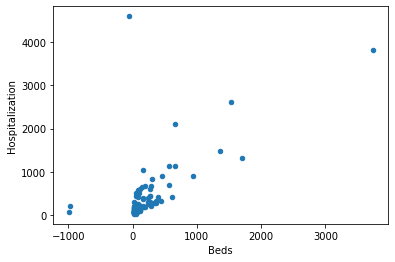

In [82]:


final_df.plot(kind='scatter', x='Beds', y='Hospitalization')



<AxesSubplot:xlabel='Beds', ylabel='Cases'>

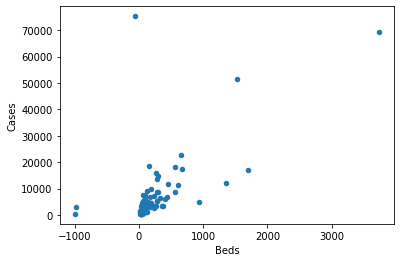

In [83]:

final_df.plot(kind='scatter', x='Beds', y='Cases')

The r-squared is: 0.4122438917959233


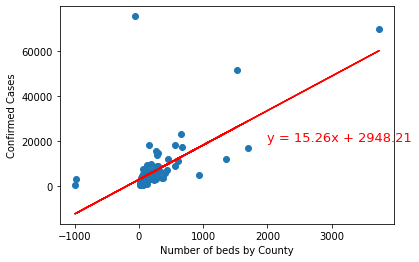

In [91]:
x_values = final_df['Beds']
y_values = final_df['Cases']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(2000,20000),fontsize=13,color="red")
plt.xlabel('Number of beds by County')
plt.ylabel('Confirmed Cases')
print(f"The r-squared is: {rvalue**2}")
plt.show()


The r-squared is: 0.4173348906342135


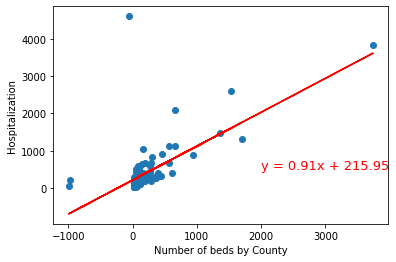

In [92]:
x_values = final_df['Beds']
y_values = final_df['Hospitalization']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(2000,500),fontsize=13,color="red")
plt.xlabel('Number of beds by County')
plt.ylabel('Hospitalization')
print(f"The r-squared is: {rvalue**2}")
plt.show()


The r-squared is: 0.5663748996056652


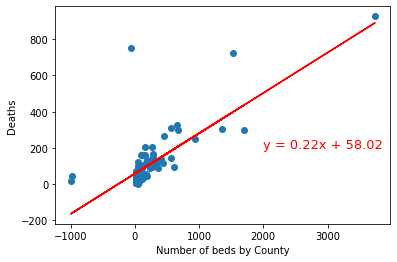

In [93]:
x_values = final_df['Beds']
y_values = final_df['Deaths']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(2000,200),fontsize=13,color="red")
plt.xlabel('Number of beds by County')
plt.ylabel('Deaths')
print(f"The r-squared is: {rvalue**2}")
plt.show()

In [94]:
GA_open_df


,Hospitals,County,Type,Beds
32,ST JOSEPH'S HOSPITAL - SAVANNAH,Chatham,GENERAL ACUTE CARE,294.0
33,KINDRED HOSPITAL ROME,Floyd,LONG TERM CARE,45.0
34,UPSON REGIONAL MEDICAL CENTER,Upson,GENERAL ACUTE CARE,115.0
35,PHOEBE SUMTER MEDICAL CENTER,Sumter,GENERAL ACUTE CARE,76.0
36,ROOSEVELT WARM SPRINGS LTAC HOSPITAL,Meriwether,LONG TERM CARE,32.0
...,...,...,...,...
7536,DEVEREUX TREATMENT NETWORK,Cobb,PSYCHIATRIC,100.0
7537,WELLSTAR PAULDING HOSPITAL,Paulding,GENERAL ACUTE CARE,216.0
7538,EMORY DUNWOODY MEDICAL CENTER,Dekalb,GENERAL ACUTE CARE,168.0
7539,BRADLEY CENTER OF SAINT FRANCIS,Muscogee,PSYCHIATRIC,-999.0


In [95]:
beds_df

,Beds
County,
Fulton,3740.0
Dekalb,3124.0
Chatham,1699.0
Cobb,1524.0
Bibb,1354.0
...,...
Jasper,17.0
Dade,13.0
Gwinnett,-57.0


The r-squared is: 0.5663748996056652


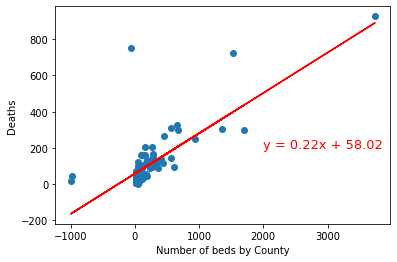

In [96]:
x_values = final_df['Beds']
y_values = final_df['Deaths']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(2000,200),fontsize=13,color="red")
plt.xlabel('Number of beds by County')
plt.ylabel('Deaths')
print(f"The r-squared is: {rvalue**2}")
plt.show()